https://docs.google.com/spreadsheets/d/1Frtx1K6j1X8g1ThGrpnMLLslfmmexeoO/edit?usp=sharing&ouid=101807145143614308444&rtpof=true&sd=true


Привет! Во вложении, файл, нужно сделать следующее

-сделать модель, предсказывающую вероятность дефолта (таргет fpd5_flg), в качестве предикторов можно использовать все что есть в файле (не обязательно абсолютно все), кроме dt (это дата выдачи кредита). Можно делать в чем угодно. Преобразовывать переменные можно как угодно. В качестве инструмента можно выбрать обычную логистическую регрессию.

-на выходе должен быть тот же самый файл, но напротив каждого наблюдения должна быть проставлена вероятность дефолта по построенной модели

-нужно сделать мини-отчет по модели в Excel или Word (или Jupiter Notebook), показать Gini (AuROC) модели, распределение (гистограмму) по предсказанной вероятности дефолта и описать кратко что было сделано и как

Оцениваться будет не финальный результат в плане Gini (или других метрик), а скорее ход мыслей и порядок действий.

In [ ]:
import matplotlib as plt
plt.style.use('dark_background')

In [ ]:
! gdown --id 1Frtx1K6j1X8g1ThGrpnMLLslfmmexeoO

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Frtx1K6j1X8g1ThGrpnMLLslfmmexeoO
To: /content/fintech-testcase-default.xlsx
100% 928k/928k [00:00<00:00, 16.1MB/s]


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_excel('/content/fintech-testcase-default.xlsx')

In [ ]:
df.head()

,fpd5_flg,dt,gender,device_quaility_index,behavioral_index,type_of_document,age,email_domain_formatted,social_status,salary,disbursment_type,os,email_index
0,0,2021-01-22,0,NaN,NaN,UMID,26,GMAIL.COM,Private Company Employee,20000.0,Bank,Android,0.0
1,0,2020-12-14,1,3.0,4.0,UMID,32,GMAIL.COM,Other,18000.0,E-wallet,Android,1.0
2,1,2021-01-26,0,0.0,3.0,SSS,41,YAHOO.COM,Private Company Employee,14000.0,Bank,Android,1.0
3,1,2020-12-10,1,0.0,5.0,TIN,28,GMAIL.COM,BPO Professionals,40000.0,E-wallet,Android,1.0
4,1,2021-01-17,0,3.0,3.0,UMID,31,GMAIL.COM,BPO Professionals,25000.0,Bank,Android,0.0


# EDA

In [ ]:
df['fpd5_flg'].mean()

0.2727982815856278

In [ ]:
df.isna().mean()

,0
fpd5_flg,0.000000
dt,0.000000
gender,0.000000
device_quaility_index,0.036777
behavioral_index,0.036777
type_of_document,0.000000
age,0.000000
email_domain_formatted,0.000000
social_status,0.000000
salary,0.046475


In [ ]:
df['dt'] = pd.to_datetime(df['dt'], format='%Y-%m-%d')

In [ ]:
df['dt'].agg(['min','max'])

,dt
min,2020-12-09
max,2021-02-03


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15363 entries, 0 to 15362
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   fpd5_flg                15363 non-null  int64         
 1   dt                      15363 non-null  datetime64[ns]
 2   gender                  15363 non-null  int64         
 3   device_quaility_index   14798 non-null  float64       
 4   behavioral_index        14798 non-null  float64       
 5   type_of_document        15363 non-null  object        
 6   age                     15363 non-null  int64         
 7   email_domain_formatted  15363 non-null  object        
 8   social_status           15363 non-null  object        
 9   salary                  14649 non-null  float64       
 10  disbursment_type        15363 non-null  object        
 11  os                      15347 non-null  object        
 12  email_index             15330 non-null  float6

In [ ]:
df.describe()

,fpd5_flg,dt,gender,device_quaility_index,behavioral_index,age,salary,email_index
count,15363.000000,15363,15363.000000,14798.000000,14798.000000,15363.000000,1.464900e+04,15330.000000
mean,0.272798,2021-01-06 22:09:35.043936768,0.629109,2.369982,4.051291,35.135781,1.261647e+05,1.580039
min,0.000000,2020-12-09 00:00:00,0.000000,0.000000,1.000000,21.000000,0.000000e+00,0.000000
25%,0.000000,2020-12-26 00:00:00,0.000000,2.000000,3.000000,28.000000,1.500000e+04,0.000000
50%,0.000000,2021-01-09 00:00:00,1.000000,3.000000,4.000000,34.000000,2.000000e+04,1.000000
75%,1.000000,2021-01-20 00:00:00,1.000000,3.000000,5.000000,41.000000,2.600000e+04,1.000000
max,1.000000,2021-02-03 00:00:00,1.000000,4.000000,6.000000,69.000000,1.500020e+09,12.000000
std,0.445412,NaN,0.483059,1.077686,0.937965,9.125229,1.239332e+07,2.397705


In [ ]:
df

,fpd5_flg,dt,gender,device_quaility_index,behavioral_index,type_of_document,age,email_domain_formatted,social_status,salary,disbursment_type,os,email_index
0,0,2021-01-22,0,NaN,NaN,UMID,26,GMAIL.COM,Private Company Employee,20000.0,Bank,Android,0.0
1,0,2020-12-14,1,3.0,4.0,UMID,32,GMAIL.COM,Other,18000.0,E-wallet,Android,1.0
2,1,2021-01-26,0,0.0,3.0,SSS,41,YAHOO.COM,Private Company Employee,14000.0,Bank,Android,1.0
3,1,2020-12-10,1,0.0,5.0,TIN,28,GMAIL.COM,BPO Professionals,40000.0,E-wallet,Android,1.0
4,1,2021-01-17,0,3.0,3.0,UMID,31,GMAIL.COM,BPO Professionals,25000.0,Bank,Android,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15358,0,2021-01-05,1,3.0,5.0,UMID,36,GMAIL.COM,Business Owner,25000.0,E-wallet,Android,6.0
15359,1,2021-01-23,1,0.0,3.0,Passport,32,GMAIL.COM,Self-Employed,25000.0,E-wallet,Android,1.0
15360,1,2021-02-01,1,1.0,5.0,UMID,29,GMAIL.COM,Private Company Employee,25000.0,E-wallet,Android,0.0
15361,0,2020-12-14,1,1.0,5.0,UMID,37,GMAIL.COM,Private Company Employee,25000.0,Bank,Android,6.0


In [ ]:
df.groupby('os')['fpd5_flg'].agg(['count','mean'])

,count,mean
os,,
Android,11499,0.284460
Chrome OS,5,0.600000
Linux,7,0.571429
OS X,4,0.500000
Windows,845,0.261538
iOS,2947,0.230743
macOS,40,0.150000


In [ ]:
df

,fpd5_flg,dt,gender,device_quaility_index,behavioral_index,type_of_document,age,email_domain_formatted,social_status,salary,disbursment_type,os,email_index
0,0,2021-01-22,0,NaN,NaN,UMID,26,GMAIL.COM,Private Company Employee,20000.0,Bank,Android,0.0
1,0,2020-12-14,1,3.0,4.0,UMID,32,GMAIL.COM,Other,18000.0,E-wallet,Android,1.0
2,1,2021-01-26,0,0.0,3.0,SSS,41,YAHOO.COM,Private Company Employee,14000.0,Bank,Android,1.0
3,1,2020-12-10,1,0.0,5.0,TIN,28,GMAIL.COM,BPO Professionals,40000.0,E-wallet,Android,1.0
4,1,2021-01-17,0,3.0,3.0,UMID,31,GMAIL.COM,BPO Professionals,25000.0,Bank,Android,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15358,0,2021-01-05,1,3.0,5.0,UMID,36,GMAIL.COM,Business Owner,25000.0,E-wallet,Android,6.0
15359,1,2021-01-23,1,0.0,3.0,Passport,32,GMAIL.COM,Self-Employed,25000.0,E-wallet,Android,1.0
15360,1,2021-02-01,1,1.0,5.0,UMID,29,GMAIL.COM,Private Company Employee,25000.0,E-wallet,Android,0.0
15361,0,2020-12-14,1,1.0,5.0,UMID,37,GMAIL.COM,Private Company Employee,25000.0,Bank,Android,6.0


In [ ]:
t = df.groupby('email_domain_formatted')['fpd5_flg'].agg(['count','mean'])

In [ ]:
t.sort_values('count', ascending=False).head(10)

,count,mean
email_domain_formatted,,
GMAIL.COM,12109,0.286564
YAHOO.COM,2626,0.228104
YAHOO.COM.PH,182,0.153846
DEPED.GOV.PH,100,0.230000
ICLOUD.COM,88,0.238636
YMAIL.COM,67,0.223881
ROCKETMAIL.COM,37,0.216216
HOTMAIL.COM,22,0.136364
OUTLOOK.COM,19,0.210526


In [ ]:
df.groupby('behavioral_index',dropna=False)['fpd5_flg'].agg(['count','mean'])

,count,mean
behavioral_index,,
1.0,23,0.043478
2.0,202,0.198020
3.0,4675,0.265027
4.0,4721,0.260538
5.0,4447,0.287385
6.0,730,0.324658
NaN,565,0.293805


<Axes: xlabel='behavioral_index'>

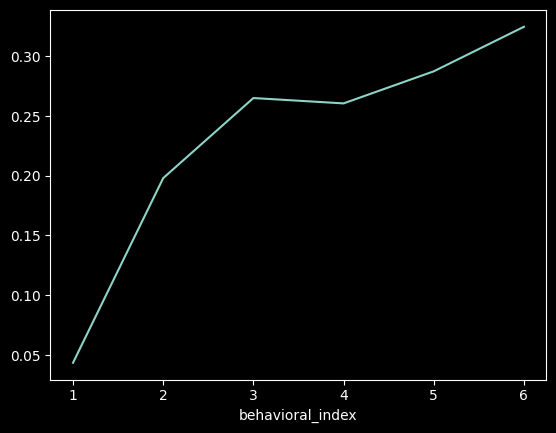

In [ ]:
df.groupby('behavioral_index',dropna=False)['fpd5_flg'].mean().plot()

In [ ]:
df.groupby('device_quaility_index',dropna=False)['fpd5_flg'].agg(['count','mean'])

,count,mean
device_quaility_index,,
0.0,1122,0.330660
1.0,2374,0.291070
2.0,2337,0.307659
3.0,7837,0.257496
4.0,1128,0.200355
NaN,565,0.293805


<Axes: xlabel='device_quaility_index'>

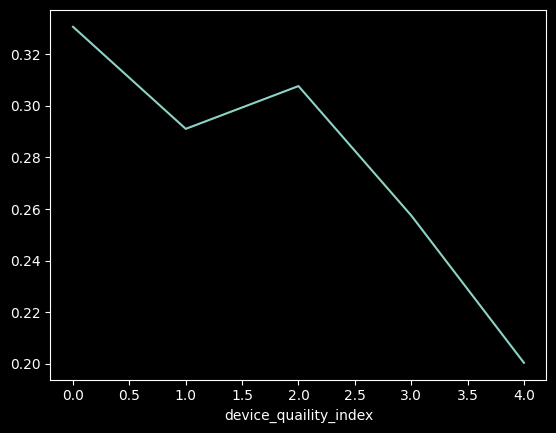

In [ ]:
df.groupby('device_quaility_index',dropna=False)['fpd5_flg'].mean().plot()

In [ ]:
df

,fpd5_flg,dt,gender,device_quaility_index,behavioral_index,type_of_document,age,email_domain_formatted,social_status,salary,disbursment_type,os,email_index
0,0,2021-01-22,0,NaN,NaN,UMID,26,GMAIL.COM,Private Company Employee,20000.0,Bank,Android,0.0
1,0,2020-12-14,1,3.0,4.0,UMID,32,GMAIL.COM,Other,18000.0,E-wallet,Android,1.0
2,1,2021-01-26,0,0.0,3.0,SSS,41,YAHOO.COM,Private Company Employee,14000.0,Bank,Android,1.0
3,1,2020-12-10,1,0.0,5.0,TIN,28,GMAIL.COM,BPO Professionals,40000.0,E-wallet,Android,1.0
4,1,2021-01-17,0,3.0,3.0,UMID,31,GMAIL.COM,BPO Professionals,25000.0,Bank,Android,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15358,0,2021-01-05,1,3.0,5.0,UMID,36,GMAIL.COM,Business Owner,25000.0,E-wallet,Android,6.0
15359,1,2021-01-23,1,0.0,3.0,Passport,32,GMAIL.COM,Self-Employed,25000.0,E-wallet,Android,1.0
15360,1,2021-02-01,1,1.0,5.0,UMID,29,GMAIL.COM,Private Company Employee,25000.0,E-wallet,Android,0.0
15361,0,2020-12-14,1,1.0,5.0,UMID,37,GMAIL.COM,Private Company Employee,25000.0,Bank,Android,6.0


In [ ]:
df.groupby('type_of_document',dropna=False)['fpd5_flg'].agg(['count','mean'])

,count,mean
type_of_document,,
Driver license ID,3073,0.277904
PRC,449,0.187082
Passport,1867,0.274772
SSS,1498,0.242991
TIN,3057,0.307164
UMID,5419,0.265178


<Axes: xlabel='type_of_document'>

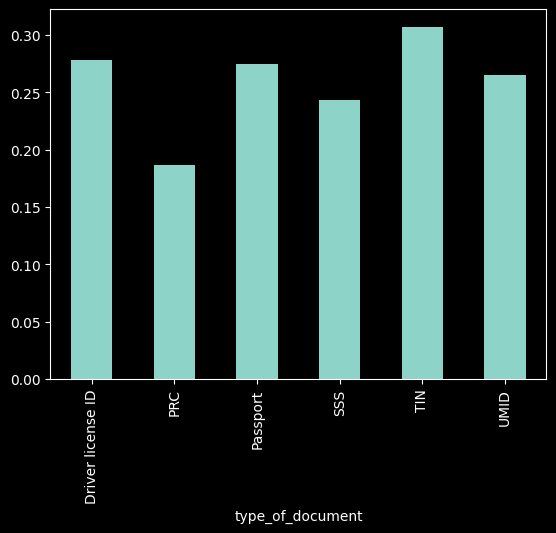

In [ ]:
df.groupby('type_of_document',dropna=False)['fpd5_flg'].mean().plot(kind='bar')

In [ ]:
df

,fpd5_flg,dt,gender,device_quaility_index,behavioral_index,type_of_document,age,email_domain_formatted,social_status,salary,disbursment_type,os,email_index
0,0,2021-01-22,0,NaN,NaN,UMID,26,GMAIL.COM,Private Company Employee,20000.0,Bank,Android,0.0
1,0,2020-12-14,1,3.0,4.0,UMID,32,GMAIL.COM,Other,18000.0,E-wallet,Android,1.0
2,1,2021-01-26,0,0.0,3.0,SSS,41,YAHOO.COM,Private Company Employee,14000.0,Bank,Android,1.0
3,1,2020-12-10,1,0.0,5.0,TIN,28,GMAIL.COM,BPO Professionals,40000.0,E-wallet,Android,1.0
4,1,2021-01-17,0,3.0,3.0,UMID,31,GMAIL.COM,BPO Professionals,25000.0,Bank,Android,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15358,0,2021-01-05,1,3.0,5.0,UMID,36,GMAIL.COM,Business Owner,25000.0,E-wallet,Android,6.0
15359,1,2021-01-23,1,0.0,3.0,Passport,32,GMAIL.COM,Self-Employed,25000.0,E-wallet,Android,1.0
15360,1,2021-02-01,1,1.0,5.0,UMID,29,GMAIL.COM,Private Company Employee,25000.0,E-wallet,Android,0.0
15361,0,2020-12-14,1,1.0,5.0,UMID,37,GMAIL.COM,Private Company Employee,25000.0,Bank,Android,6.0


<Axes: >

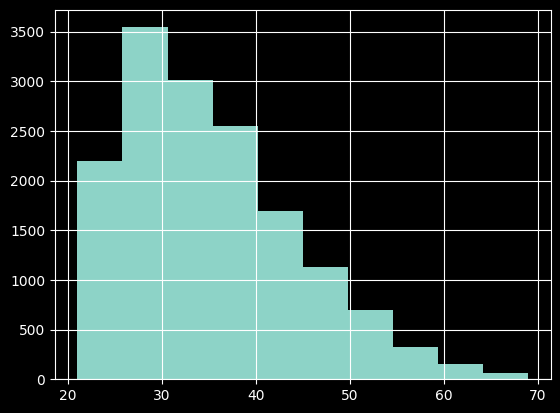

In [ ]:
df['age'].hist()

In [ ]:
df['age_bin'] = pd.qcut(df['age'],5)

<ipython-input-27-69a20bbf1254>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('age_bin',dropna=False)['fpd5_flg'].mean().plot()


<Axes: xlabel='age_bin'>

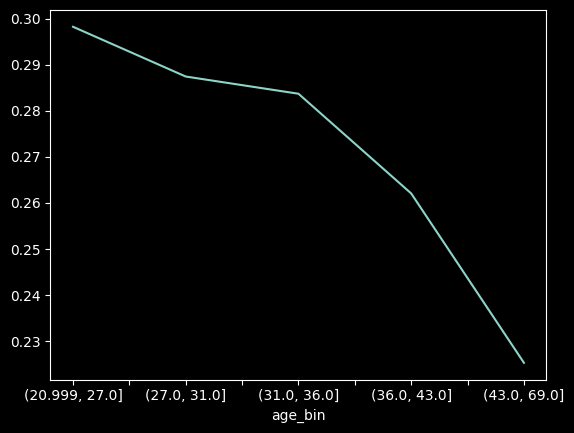

In [ ]:
df.groupby('age_bin',dropna=False)['fpd5_flg'].mean().plot()

In [ ]:
df

,fpd5_flg,dt,gender,device_quaility_index,behavioral_index,type_of_document,age,email_domain_formatted,social_status,salary,disbursment_type,os,email_index,age_bin
0,0,2021-01-22,0,NaN,NaN,UMID,26,GMAIL.COM,Private Company Employee,20000.0,Bank,Android,0.0,"(20.999, 27.0]"
1,0,2020-12-14,1,3.0,4.0,UMID,32,GMAIL.COM,Other,18000.0,E-wallet,Android,1.0,"(31.0, 36.0]"
2,1,2021-01-26,0,0.0,3.0,SSS,41,YAHOO.COM,Private Company Employee,14000.0,Bank,Android,1.0,"(36.0, 43.0]"
3,1,2020-12-10,1,0.0,5.0,TIN,28,GMAIL.COM,BPO Professionals,40000.0,E-wallet,Android,1.0,"(27.0, 31.0]"
4,1,2021-01-17,0,3.0,3.0,UMID,31,GMAIL.COM,BPO Professionals,25000.0,Bank,Android,0.0,"(27.0, 31.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15358,0,2021-01-05,1,3.0,5.0,UMID,36,GMAIL.COM,Business Owner,25000.0,E-wallet,Android,6.0,"(31.0, 36.0]"
15359,1,2021-01-23,1,0.0,3.0,Passport,32,GMAIL.COM,Self-Employed,25000.0,E-wallet,Android,1.0,"(31.0, 36.0]"
15360,1,2021-02-01,1,1.0,5.0,UMID,29,GMAIL.COM,Private Company Employee,25000.0,E-wallet,Android,0.0,"(27.0, 31.0]"
15361,0,2020-12-14,1,1.0,5.0,UMID,37,GMAIL.COM,Private Company Employee,25000.0,Bank,Android,6.0,"(36.0, 43.0]"


In [ ]:
t = df.groupby('social_status',dropna=False)['fpd5_flg'].agg(['count','mean']).sort_values('mean',ascending=False)

In [ ]:
t

,count,mean
social_status,,
Self-Employed,2323,0.302195
Retail Worker,402,0.298507
Unemployed,642,0.288162
Business Owner,1680,0.284524
Freelance,777,0.280566
Other,1703,0.276571
BPO Professionals,2295,0.272767
Private Company Employee,3500,0.264286
Government Employee,1061,0.258247


<Axes: xlabel='social_status'>

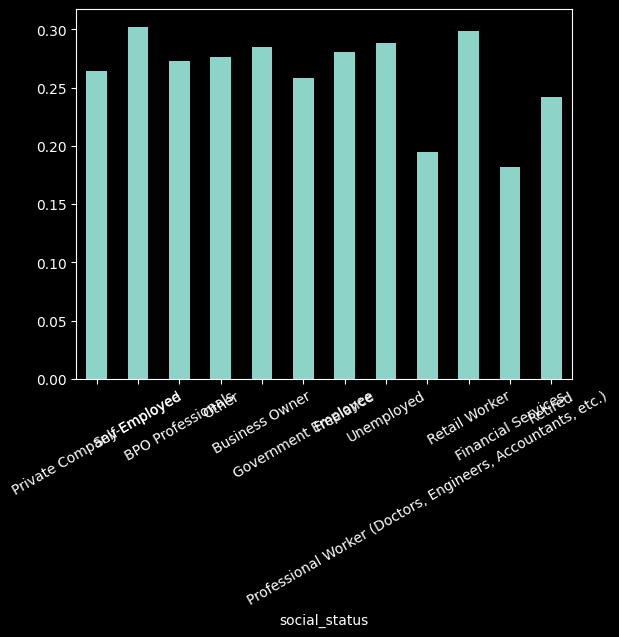

In [ ]:
t.sort_values('count',ascending=False)['mean'].plot(kind='bar',rot=30)

<Axes: >

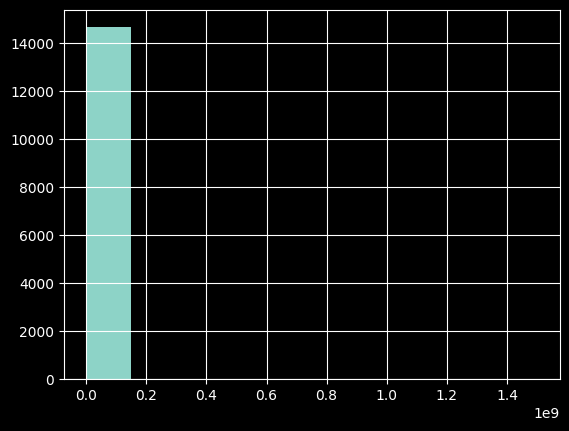

In [ ]:
df['salary'].hist()

In [ ]:
df['salary_bin'] = pd.qcut(df['salary'],5)

In [ ]:
df.groupby('salary_bin',dropna=False)['fpd5_flg'].agg(['count','mean'])

<ipython-input-34-9751bbca1ba9>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('salary_bin',dropna=False)['fpd5_flg'].agg(['count','mean'])


,count,mean
salary_bin,,
"(-0.001, 14000.0]",3026,0.298083
"(14000.0, 18000.0]",3036,0.291173
"(18000.0, 22000.0]",2820,0.275532
"(22000.0, 30000.0]",3906,0.273682
"(30000.0, 1500020000.0]",1861,0.193982
NaN,714,0.277311


In [ ]:
df

,fpd5_flg,dt,gender,device_quaility_index,behavioral_index,type_of_document,age,email_domain_formatted,social_status,salary,disbursment_type,os,email_index,age_bin,salary_bin
0,0,2021-01-22,0,NaN,NaN,UMID,26,GMAIL.COM,Private Company Employee,20000.0,Bank,Android,0.0,"(20.999, 27.0]","(18000.0, 22000.0]"
1,0,2020-12-14,1,3.0,4.0,UMID,32,GMAIL.COM,Other,18000.0,E-wallet,Android,1.0,"(31.0, 36.0]","(14000.0, 18000.0]"
2,1,2021-01-26,0,0.0,3.0,SSS,41,YAHOO.COM,Private Company Employee,14000.0,Bank,Android,1.0,"(36.0, 43.0]","(-0.001, 14000.0]"
3,1,2020-12-10,1,0.0,5.0,TIN,28,GMAIL.COM,BPO Professionals,40000.0,E-wallet,Android,1.0,"(27.0, 31.0]","(30000.0, 1500020000.0]"
4,1,2021-01-17,0,3.0,3.0,UMID,31,GMAIL.COM,BPO Professionals,25000.0,Bank,Android,0.0,"(27.0, 31.0]","(22000.0, 30000.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15358,0,2021-01-05,1,3.0,5.0,UMID,36,GMAIL.COM,Business Owner,25000.0,E-wallet,Android,6.0,"(31.0, 36.0]","(22000.0, 30000.0]"
15359,1,2021-01-23,1,0.0,3.0,Passport,32,GMAIL.COM,Self-Employed,25000.0,E-wallet,Android,1.0,"(31.0, 36.0]","(22000.0, 30000.0]"
15360,1,2021-02-01,1,1.0,5.0,UMID,29,GMAIL.COM,Private Company Employee,25000.0,E-wallet,Android,0.0,"(27.0, 31.0]","(22000.0, 30000.0]"
15361,0,2020-12-14,1,1.0,5.0,UMID,37,GMAIL.COM,Private Company Employee,25000.0,Bank,Android,6.0,"(36.0, 43.0]","(22000.0, 30000.0]"


In [ ]:
df.groupby('disbursment_type', dropna=False)['fpd5_flg'].agg(['count','mean'])

,count,mean
disbursment_type,,
Bank,8918,0.216192
E-wallet,6445,0.351125


In [ ]:
t = df.groupby('email_index',dropna=False)['fpd5_flg'].agg(['count','mean'])

In [ ]:
t.sort_values('count',ascending=False)

,count,mean
email_index,,
1.0,8926,0.281201
0.0,4253,0.236539
8.0,1329,0.314522
6.0,273,0.296703
4.0,232,0.331897
10.0,176,0.318182
2.0,129,0.217054
NaN,33,0.303030
3.0,7,0.285714


<Axes: xlabel='email_index'>

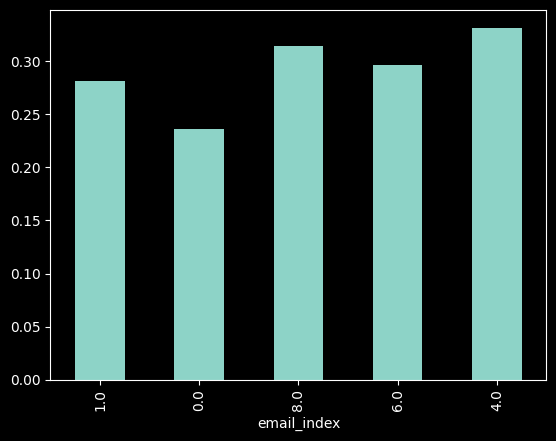

In [ ]:
t.sort_values('count',ascending=False)['mean'].head(5).plot(kind='bar')

In [ ]:
df.groupby('gender',dropna=False)['fpd5_flg'].agg(['count','mean'])

,count,mean
gender,,
0,5698,0.307125
1,9665,0.252561


https://towardsdatascience.com/phik-k-get-familiar-with-the-latest-correlation-coefficient-9ba0032b37e7#:~:text=Phik%20(%F0%9D%9C%99k)%20is%20a%20new,a%20bivariate%20normal%20input%20distribution.

In [ ]:
! pip install phik

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 13.7 MB/s eta 0:00:00


In [ ]:
import phik

In [ ]:
df.phik_matrix()

interval columns not set, guessing: ['fpd5_flg', 'gender', 'device_quaility_index', 'behavioral_index', 'age', 'salary', 'email_index']


,fpd5_flg,dt,gender,device_quaility_index,behavioral_index,type_of_document,age,email_domain_formatted,social_status,salary,disbursment_type,os,email_index,age_bin,salary_bin
fpd5_flg,1.000000,0.179723,0.091720,0.057179,0.058806,0.069666,0.070979,0.054985,0.062040,0.000000,0.232129,0.046882,0.046284,0.044294,0.056233
dt,0.179723,1.000000,0.057663,0.134570,0.361837,0.008519,0.122706,0.115675,0.153126,0.000000,0.522947,0.137886,0.129260,0.116670,0.106451
gender,0.091720,0.057663,1.000000,0.065936,0.025753,0.455277,0.057165,0.047446,0.177373,0.000000,0.064303,0.071936,0.000000,0.011091,0.068054
device_quaility_index,0.057179,0.134570,0.065936,1.000000,0.040314,0.100915,0.275238,0.137969,0.166129,0.007937,0.160221,0.449731,0.076021,0.297073,0.303540
behavioral_index,0.058806,0.361837,0.025753,0.040314,1.000000,0.000000,0.025304,0.045929,0.036717,0.000000,0.080147,0.056730,0.015028,0.014828,0.013345
type_of_document,0.069666,0.008519,0.455277,0.100915,0.000000,1.000000,0.234321,0.121405,0.365943,0.024192,0.116474,0.068340,0.077921,0.202632,0.085047
age,0.070979,0.122706,0.057165,0.275238,0.025304,0.234321,1.000000,0.199593,0.343517,0.000000,0.168076,0.119451,0.072171,0.982753,0.132156
email_domain_formatted,0.054985,0.115675,0.047446,0.137969,0.045929,0.121405,0.199593,1.000000,0.299634,0.000000,0.101021,0.172541,0.847053,0.139150,0.143645
social_status,0.062040,0.153126,0.177373,0.166129,0.036717,0.365943,0.343517,0.299634,1.000000,0.000000,0.411385,0.159123,0.206844,0.250083,0.291937
salary,0.000000,0.000000,0.000000,0.007937,0.000000,0.024192,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.011443


In [ ]:
df.global_phik()

interval columns not set, guessing: ['fpd5_flg', 'gender', 'device_quaility_index', 'behavioral_index', 'age', 'salary', 'email_index']


(array([[0.29965417],
        [0.67020498],
        [0.54959566],
        [0.58272331],
        [0.40231844],
        [0.57381433],
        [0.99613562],
        [0.9473762 ],
        [0.7583526 ],
        [0.03500732],
        [0.7585519 ],
        [0.53291133],
        [0.93720381],
        [0.99587094],
        [0.58222167]]),
 array(['fpd5_flg', 'dt', 'gender', 'device_quaility_index',
        'behavioral_index', 'type_of_document', 'age',
        'email_domain_formatted', 'social_status', 'salary',
        'disbursment_type', 'os', 'email_index', 'age_bin', 'salary_bin'],
       dtype=object))

# Model

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df.columns

Index(['fpd5_flg', 'dt', 'gender', 'device_quaility_index', 'behavioral_index',
       'type_of_document', 'age', 'email_domain_formatted', 'social_status',
       'salary', 'disbursment_type', 'os', 'email_index', 'age_bin',
       'salary_bin'],
      dtype='object')

In [ ]:
X = ['gender', 'device_quaility_index', 'behavioral_index',
       'type_of_document', 'age', 'email_domain_formatted', 'social_status',
       'salary', 'disbursment_type', 'os', 'email_index']

y = ['fpd5_flg']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[X],
                                                    df[y],
                                                    test_size=0.3,
                                                    random_state=42)

In [ ]:
X_train

,gender,device_quaility_index,behavioral_index,type_of_document,age,email_domain_formatted,social_status,salary,disbursment_type,os,email_index
3132,0,1.0,5.0,UMID,24,GMAIL.COM,Other,20000.0,E-wallet,Android,0.0
7655,1,2.0,5.0,Passport,35,YAHOO.COM,Other,15000.0,E-wallet,Android,0.0
3520,1,3.0,4.0,Passport,37,ICLOUD.COM,Other,25000.0,E-wallet,iOS,8.0
14251,1,3.0,5.0,UMID,26,GMAIL.COM,"Professional Worker (Doctors, Engineers, Accou...",16000.0,Bank,iOS,1.0
2588,0,3.0,6.0,Driver license ID,50,GMAIL.COM,Business Owner,40000.0,E-wallet,Android,1.0
...,...,...,...,...,...,...,...,...,...,...,...
5191,0,NaN,NaN,TIN,24,GMAIL.COM,Private Company Employee,24000.0,E-wallet,Android,1.0
13418,1,2.0,4.0,UMID,26,YAHOO.COM,BPO Professionals,24000.0,Bank,macOS,1.0
5390,0,3.0,4.0,Driver license ID,24,GMAIL.COM,Self-Employed,18000.0,E-wallet,Android,8.0
860,1,0.0,3.0,UMID,28,GMAIL.COM,BPO Professionals,25000.0,Bank,Android,1.0


In [ ]:
y_train

,fpd5_flg
3132,1
7655,0
3520,0
14251,0
2588,0
...,...
5191,0
13418,0
5390,0
860,0


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10754 entries, 3132 to 7270
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  10754 non-null  int64  
 1   device_quaility_index   10361 non-null  float64
 2   behavioral_index        10361 non-null  float64
 3   type_of_document        10754 non-null  object 
 4   age                     10754 non-null  int64  
 5   email_domain_formatted  10754 non-null  object 
 6   social_status           10754 non-null  object 
 7   salary                  10267 non-null  float64
 8   disbursment_type        10754 non-null  object 
 9   os                      10742 non-null  object 
 10  email_index             10730 non-null  float64
dtypes: float64(4), int64(2), object(5)
memory usage: 1008.2+ KB


In [ ]:
features_num = X_train.select_dtypes(include='number').copy()

In [ ]:
X_train

,gender,device_quaility_index,behavioral_index,type_of_document,age,email_domain_formatted,social_status,salary,disbursment_type,os,email_index
3132,0,1.0,5.0,UMID,24,GMAIL.COM,Other,20000.0,E-wallet,Android,0.0
7655,1,2.0,5.0,Passport,35,YAHOO.COM,Other,15000.0,E-wallet,Android,0.0
3520,1,3.0,4.0,Passport,37,ICLOUD.COM,Other,25000.0,E-wallet,iOS,8.0
14251,1,3.0,5.0,UMID,26,GMAIL.COM,"Professional Worker (Doctors, Engineers, Accou...",16000.0,Bank,iOS,1.0
2588,0,3.0,6.0,Driver license ID,50,GMAIL.COM,Business Owner,40000.0,E-wallet,Android,1.0
...,...,...,...,...,...,...,...,...,...,...,...
5191,0,NaN,NaN,TIN,24,GMAIL.COM,Private Company Employee,24000.0,E-wallet,Android,1.0
13418,1,2.0,4.0,UMID,26,YAHOO.COM,BPO Professionals,24000.0,Bank,macOS,1.0
5390,0,3.0,4.0,Driver license ID,24,GMAIL.COM,Self-Employed,18000.0,E-wallet,Android,8.0
860,1,0.0,3.0,UMID,28,GMAIL.COM,BPO Professionals,25000.0,Bank,Android,1.0


In [ ]:
features_num

,gender,device_quaility_index,behavioral_index,age,salary,email_index
3132,0,1.0,5.0,24,20000.0,0.0
7655,1,2.0,5.0,35,15000.0,0.0
3520,1,3.0,4.0,37,25000.0,8.0
14251,1,3.0,5.0,26,16000.0,1.0
2588,0,3.0,6.0,50,40000.0,1.0
...,...,...,...,...,...,...
5191,0,NaN,NaN,24,24000.0,1.0
13418,1,2.0,4.0,26,24000.0,1.0
5390,0,3.0,4.0,24,18000.0,8.0
860,1,0.0,3.0,28,25000.0,1.0


In [ ]:
features_cat = X_train.select_dtypes(include='object').copy()

In [ ]:
features_cat

,type_of_document,email_domain_formatted,social_status,disbursment_type,os
3132,UMID,GMAIL.COM,Other,E-wallet,Android
7655,Passport,YAHOO.COM,Other,E-wallet,Android
3520,Passport,ICLOUD.COM,Other,E-wallet,iOS
14251,UMID,GMAIL.COM,"Professional Worker (Doctors, Engineers, Accou...",Bank,iOS
2588,Driver license ID,GMAIL.COM,Business Owner,E-wallet,Android
...,...,...,...,...,...
5191,TIN,GMAIL.COM,Private Company Employee,E-wallet,Android
13418,UMID,YAHOO.COM,BPO Professionals,Bank,macOS
5390,Driver license ID,GMAIL.COM,Self-Employed,E-wallet,Android
860,UMID,GMAIL.COM,BPO Professionals,Bank,Android


In [ ]:
features_num.isna().mean()

,0
gender,0.000000
device_quaility_index,0.036545
behavioral_index,0.036545
age,0.000000
salary,0.045285
email_index,0.002232


In [ ]:
features_num.columns

Index(['gender', 'device_quaility_index', 'behavioral_index', 'age', 'salary',
       'email_index'],
      dtype='object')

In [ ]:
most_freq_num_features = ['gender', 'device_quaility_index',
                  'behavioral_index', 'email_index']

In [ ]:
median_num_features = ['age', 'salary']

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [ ]:
median_num_pipe = Pipeline([
          ('imputer', SimpleImputer(strategy="median"))])

In [ ]:
most_freq_pipe = Pipeline([
          ('imputer', SimpleImputer(strategy="most_frequent"))])

In [ ]:
fillna_pipe = ColumnTransformer([
        ("most_freq", most_freq_pipe, most_freq_num_features),
        ("median", median_num_pipe, median_num_features),
    ])

In [ ]:
fillna_pipe.fit_transform(X_train)

array([[0.0e+00, 1.0e+00, 5.0e+00, 0.0e+00, 2.4e+01, 2.0e+04],
       [1.0e+00, 2.0e+00, 5.0e+00, 0.0e+00, 3.5e+01, 1.5e+04],
       [1.0e+00, 3.0e+00, 4.0e+00, 8.0e+00, 3.7e+01, 2.5e+04],
       ...,
       [0.0e+00, 3.0e+00, 4.0e+00, 8.0e+00, 2.4e+01, 1.8e+04],
       [1.0e+00, 0.0e+00, 3.0e+00, 1.0e+00, 2.8e+01, 2.5e+04],
       [1.0e+00, 3.0e+00, 3.0e+00, 1.0e+00, 3.8e+01, 3.0e+03]])

In [ ]:
t = pd.DataFrame(fillna_pipe.fit_transform(X_train),columns=most_freq_num_features+median_num_features)

In [ ]:
t

,gender,device_quaility_index,behavioral_index,email_index,age,salary
0,0.0,1.0,5.0,0.0,24.0,20000.0
1,1.0,2.0,5.0,0.0,35.0,15000.0
2,1.0,3.0,4.0,8.0,37.0,25000.0
3,1.0,3.0,5.0,1.0,26.0,16000.0
4,0.0,3.0,6.0,1.0,50.0,40000.0
...,...,...,...,...,...,...
10749,0.0,3.0,3.0,1.0,24.0,24000.0
10750,1.0,2.0,4.0,1.0,26.0,24000.0
10751,0.0,3.0,4.0,8.0,24.0,18000.0
10752,1.0,0.0,3.0,1.0,28.0,25000.0


In [ ]:
t.set_index(X_train.index)


,gender,device_quaility_index,behavioral_index,email_index,age,salary
3132,0.0,1.0,5.0,0.0,24.0,20000.0
7655,1.0,2.0,5.0,0.0,35.0,15000.0
3520,1.0,3.0,4.0,8.0,37.0,25000.0
14251,1.0,3.0,5.0,1.0,26.0,16000.0
2588,0.0,3.0,6.0,1.0,50.0,40000.0
...,...,...,...,...,...,...
5191,0.0,3.0,3.0,1.0,24.0,24000.0
13418,1.0,2.0,4.0,1.0,26.0,24000.0
5390,0.0,3.0,4.0,8.0,24.0,18000.0
860,1.0,0.0,3.0,1.0,28.0,25000.0


In [ ]:
t.isna().mean()

,0
gender,0.0
device_quaility_index,0.0
behavioral_index,0.0
email_index,0.0
age,0.0
salary,0.0


In [ ]:
X_train['salary'].median()

20000.0

In [ ]:
opo = t[t.index.isin(X_train[X_train['salary'].isna()].index)]

In [ ]:
opo['salary'].median()

20000.0

In [ ]:
X_train.isna().mean()

,0
gender,0.000000
device_quaility_index,0.036545
behavioral_index,0.036545
type_of_document,0.000000
age,0.000000
email_domain_formatted,0.000000
social_status,0.000000
salary,0.045285
disbursment_type,0.000000
os,0.001116


In [ ]:
X_train['device_quaility_index'].median()

3.0

In [ ]:
t[t.index.isin(X_train[X_train['device_quaility_index'].isna()].index)]

,gender,device_quaility_index,behavioral_index,email_index,age,salary
26,0.0,3.0,5.0,0.0,27.0,25000.0
28,1.0,3.0,3.0,1.0,24.0,20000.0
97,0.0,3.0,4.0,0.0,29.0,19450.0
203,1.0,3.0,3.0,8.0,35.0,1000.0
204,1.0,4.0,3.0,1.0,28.0,35000.0
...,...,...,...,...,...,...
10503,0.0,3.0,3.0,8.0,32.0,60000.0
10531,1.0,2.0,3.0,8.0,27.0,15000.0
10541,0.0,3.0,4.0,1.0,35.0,19000.0
10593,1.0,3.0,4.0,1.0,25.0,20000.0


## Feature adder

In [ ]:
df['salary_over_age'] = df['salary'] / df['age']

In [ ]:
df['salary_over_age_bins'] = pd.qcut(df['salary_over_age'],5)

In [ ]:
df.groupby('salary_over_age_bins')['fpd5_flg'].agg(['count','mean'])

<ipython-input-78-d00f44a70d16>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('salary_over_age_bins')['fpd5_flg'].agg(['count','mean'])


,count,mean
salary_over_age_bins,,
"(-0.001, 370.37]",2974,0.296234
"(370.37, 526.316]",2889,0.269297
"(526.316, 681.818]",2990,0.276923
"(681.818, 909.091]",2981,0.270044
"(909.091, 36585853.659]",2815,0.249023


<ipython-input-79-f38474c5b3af>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('salary_over_age_bins')['fpd5_flg'].mean().plot(rot=45)


<Axes: xlabel='salary_over_age_bins'>

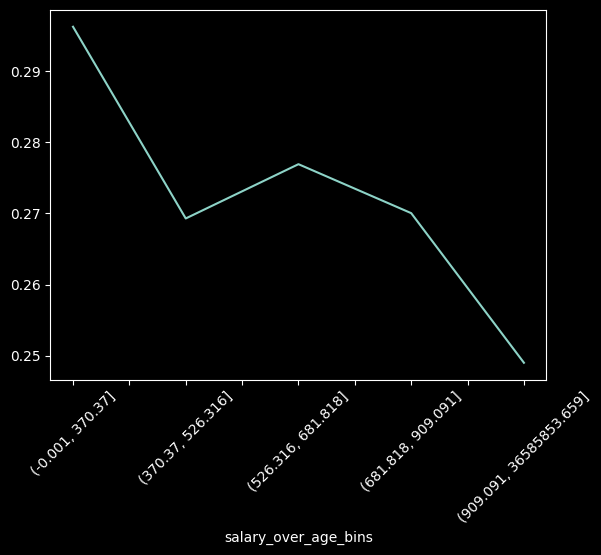

In [ ]:
df.groupby('salary_over_age_bins')['fpd5_flg'].mean().plot(rot=45)

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
age_ix, salary_ix = 4, 5

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self): # no *args or **kargs
        pass
    def fit(self, X, y=None):
        return self  # nothing else to do

    def transform(self, X):
        salary_over_age = X[:, 5] / X[:, 4]


        return np.c_[X, salary_over_age]

## todo atribute adder with target encoding

In [ ]:
attr_adder = CombinedAttributesAdder()

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
num_pipeline = Pipeline([
        ('imputer', fillna_pipe),
        ('attribs_adder', CombinedAttributesAdder()),
        #('std_scaler', StandardScaler()),
    ])

In [ ]:
num_pipeline.fit_transform(X_train)

array([[0.00000000e+00, 1.00000000e+00, 5.00000000e+00, ...,
        2.40000000e+01, 2.00000000e+04, 8.33333333e+02],
       [1.00000000e+00, 2.00000000e+00, 5.00000000e+00, ...,
        3.50000000e+01, 1.50000000e+04, 4.28571429e+02],
       [1.00000000e+00, 3.00000000e+00, 4.00000000e+00, ...,
        3.70000000e+01, 2.50000000e+04, 6.75675676e+02],
       ...,
       [0.00000000e+00, 3.00000000e+00, 4.00000000e+00, ...,
        2.40000000e+01, 1.80000000e+04, 7.50000000e+02],
       [1.00000000e+00, 0.00000000e+00, 3.00000000e+00, ...,
        2.80000000e+01, 2.50000000e+04, 8.92857143e+02],
       [1.00000000e+00, 3.00000000e+00, 3.00000000e+00, ...,
        3.80000000e+01, 3.00000000e+03, 7.89473684e+01]])

In [ ]:
t = pd.DataFrame(num_pipeline.fit_transform(X_train),
                 columns=most_freq_num_features+median_num_features +  ['salary_over_age'])

In [ ]:
t

,gender,device_quaility_index,behavioral_index,email_index,age,salary,salary_over_age
0,0.0,1.0,5.0,0.0,24.0,20000.0,833.333333
1,1.0,2.0,5.0,0.0,35.0,15000.0,428.571429
2,1.0,3.0,4.0,8.0,37.0,25000.0,675.675676
3,1.0,3.0,5.0,1.0,26.0,16000.0,615.384615
4,0.0,3.0,6.0,1.0,50.0,40000.0,800.000000
...,...,...,...,...,...,...,...
10749,0.0,3.0,3.0,1.0,24.0,24000.0,1000.000000
10750,1.0,2.0,4.0,1.0,26.0,24000.0,923.076923
10751,0.0,3.0,4.0,8.0,24.0,18000.0,750.000000
10752,1.0,0.0,3.0,1.0,28.0,25000.0,892.857143


In [ ]:
t = pd.DataFrame({'A':[1,0],'B':[0,1]})

In [ ]:
t

,A,B
0,1,0
1,0,1


In [ ]:
t.corr()

,A,B
A,1.0,-1.0
B,-1.0,1.0


# Categorical pipe

In [ ]:
num_attribs = list(features_num.columns)

In [ ]:
cat_attribs = list(features_cat.columns)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ohe = OneHotEncoder(handle_unknown='ignore')

In [ ]:
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", ohe, cat_attribs),
    ])

In [ ]:
t = pd.DataFrame(full_pipeline.fit_transform(X_train).toarray())

In [ ]:
t


,0,1,2,3,4,5,6,7,8,9,...,95,96,97,98,99,100,101,102,103,104
0,0.0,1.0,5.0,0.0,24.0,20000.0,833.333333,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,2.0,5.0,0.0,35.0,15000.0,428.571429,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,3.0,4.0,8.0,37.0,25000.0,675.675676,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,3.0,5.0,1.0,26.0,16000.0,615.384615,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,3.0,6.0,1.0,50.0,40000.0,800.000000,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10749,0.0,3.0,3.0,1.0,24.0,24000.0,1000.000000,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10750,1.0,2.0,4.0,1.0,26.0,24000.0,923.076923,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10751,0.0,3.0,4.0,8.0,24.0,18000.0,750.000000,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10752,1.0,0.0,3.0,1.0,28.0,25000.0,892.857143,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
cat_features_names = list(full_pipeline.transformers_[1][1].get_feature_names_out())


In [ ]:
cat_features_names

['type_of_document_Driver license ID',
 'type_of_document_PRC',
 'type_of_document_Passport',
 'type_of_document_SSS',
 'type_of_document_TIN',
 'type_of_document_UMID',
 'email_domain_formatted_ABS-CBN.COM',
 'email_domain_formatted_ABSOLUTELYCANDO.COM',
 'email_domain_formatted_AMSAMOA.EDU',
 'email_domain_formatted_AOL.COM',
 'email_domain_formatted_BOLTONINTERNATIONAL.COM',
 'email_domain_formatted_BULSU.EDU.PH',
 'email_domain_formatted_BURGANDRILLING.COM',
 'email_domain_formatted_CAREMIN.COM',
 'email_domain_formatted_CIIF.PH',
 'email_domain_formatted_CPSCTECH.ORG',
 'email_domain_formatted_DAVIESPAINTS.COM.PH',
 'email_domain_formatted_DEPED.GOV.PH',
 'email_domain_formatted_DEPEDQC.PH',
 'email_domain_formatted_DEXCOM.COM',
 'email_domain_formatted_DLSU.EDU.PH',
 'email_domain_formatted_EMAIL.COM',
 'email_domain_formatted_EMAIL.COM.PH',
 'email_domain_formatted_EMAIL.PH',
 'email_domain_formatted_EXELCIUSPH.COM',
 'email_domain_formatted_FRONTIER.COM',
 'email_domain_formatt

In [ ]:
t.columns = most_freq_num_features+median_num_features + ['salary_over_age'] + cat_features_names

In [ ]:
features_cat.isna().mean()

,0
type_of_document,0.000000
email_domain_formatted,0.000000
social_status,0.000000
disbursment_type,0.000000
os,0.001116


In [ ]:
t

,gender,device_quaility_index,behavioral_index,email_index,age,salary,salary_over_age,type_of_document_Driver license ID,type_of_document_PRC,type_of_document_Passport,...,disbursment_type_Bank,disbursment_type_E-wallet,os_Android,os_Chrome OS,os_Linux,os_OS X,os_Windows,os_iOS,os_macOS,os_nan
0,0.0,1.0,5.0,0.0,24.0,20000.0,833.333333,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,2.0,5.0,0.0,35.0,15000.0,428.571429,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,3.0,4.0,8.0,37.0,25000.0,675.675676,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,3.0,5.0,1.0,26.0,16000.0,615.384615,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,3.0,6.0,1.0,50.0,40000.0,800.000000,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10749,0.0,3.0,3.0,1.0,24.0,24000.0,1000.000000,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10750,1.0,2.0,4.0,1.0,26.0,24000.0,923.076923,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10751,0.0,3.0,4.0,8.0,24.0,18000.0,750.000000,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10752,1.0,0.0,3.0,1.0,28.0,25000.0,892.857143,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
full_pipeline.transform(X_test)

<4609x105 sparse matrix of type '<class 'numpy.float64'>'
	with 51943 stored elements in Compressed Sparse Row format>

# Full Pipeline

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [ ]:
most_freq_num_features = ['gender', 'device_quaility_index',
                  'behavioral_index', 'email_index']

In [ ]:
median_num_features = ['age', 'salary']

In [ ]:
median_num_pipe = Pipeline([
          ('imputer', SimpleImputer(strategy="median"))])

In [ ]:
most_freq_pipe = Pipeline([
          ('imputer', SimpleImputer(strategy="most_frequent"))])

In [ ]:
fillna_pipe = ColumnTransformer([
        ("most_freq", most_freq_pipe, most_freq_num_features),
        ("median", median_num_pipe, median_num_features),
    ])

In [ ]:
# column index
age_ix, salary_ix = 4, 5

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self): # no *args or **kargs
        pass
    def fit(self, X, y=None):
        return self  # nothing else to do

    def transform(self, X):
        salary_over_age = X[:, 5] / X[:, 4]


        return np.c_[X, salary_over_age]

## todo atribute adder with target encoding

In [ ]:
attr_adder = CombinedAttributesAdder()

In [ ]:
num_pipeline = Pipeline([
        ('imputer', fillna_pipe),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

In [ ]:
num_attribs = ['gender',
 'device_quaility_index',
 'behavioral_index',
 'age',
 'salary',
 'email_index']

In [ ]:
cat_attribs = ['type_of_document',
 'email_domain_formatted',
 'social_status',
 'disbursment_type',
 'os']

In [ ]:
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(handle_unknown='ignore'), cat_attribs),
    ])

In [ ]:
t = pd.DataFrame(full_pipeline.fit_transform(X_train).toarray())

In [ ]:
cat_features_names = list(full_pipeline.transformers_[1][1].get_feature_names_out())

In [ ]:
t.columns = most_freq_num_features+median_num_features + \
            ['salary_over_age'] + cat_features_names

In [ ]:
t

,gender,device_quaility_index,behavioral_index,email_index,age,salary,salary_over_age,type_of_document_Driver license ID,type_of_document_PRC,type_of_document_Passport,...,disbursment_type_Bank,disbursment_type_E-wallet,os_Android,os_Chrome OS,os_Linux,os_OS X,os_Windows,os_iOS,os_macOS,os_nan
0,-1.296325,-1.308532,1.046387,-0.658811,-1.224148,-0.009906,-0.009285,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.771411,-0.370152,1.046387,-0.658811,-0.015227,-0.010252,-0.010432,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.771411,0.568229,-0.012704,2.686848,0.204577,-0.009561,-0.009732,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.771411,0.568229,1.046387,-0.240603,-1.004344,-0.010183,-0.009903,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-1.296325,0.568229,2.105478,-0.240603,1.633301,-0.008524,-0.009379,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10749,-1.296325,0.568229,-1.071796,-0.240603,-1.224148,-0.009630,-0.008812,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10750,0.771411,-0.370152,-0.012704,-0.240603,-1.004344,-0.009630,-0.009031,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10751,-1.296325,0.568229,-0.012704,2.686848,-1.224148,-0.010045,-0.009521,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10752,0.771411,-2.246913,-1.071796,-0.240603,-0.784541,-0.009561,-0.009116,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Modeling

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
X_train_prep = pd.DataFrame(full_pipeline.fit_transform(X_train).toarray())

In [ ]:
cat_features_names = list(full_pipeline.transformers_[1][1].get_feature_names_out())

In [ ]:
X_train_prep.columns = most_freq_num_features+median_num_features + \
            ['salary_over_age'] + cat_features_names

In [ ]:
log_reg = LogisticRegression(max_iter=10000)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_reg = DecisionTreeClassifier(random_state=42)

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.metrics import roc_auc_score, average_precision_score

In [ ]:
from sklearn.metrics import make_scorer

In [ ]:
X_train_prep.shape

(10754, 105)

In [ ]:
scores = cross_val_score(log_reg, X_train_prep, y_train,
                         scoring='roc_auc', cv=5)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

In [ ]:
scores

array([0.60616302, 0.62973005, 0.64194025, 0.62836729, 0.61793692])

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gb = GradientBoostingClassifier()

In [ ]:
scores = cross_val_score(gb, X_train_prep, y_train['fpd5_flg'].values,
                         scoring='roc_auc', cv=5)

In [ ]:
scores

array([0.60240364, 0.63517864, 0.62389851, 0.63363213, 0.62115382])

In [ ]:
! pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.5 MB/s eta 0:00:00


# Catboost

In [ ]:
from catboost import CatBoostClassifier

In [ ]:
cat_attribs

['type_of_document',
 'email_domain_formatted',
 'social_status',
 'disbursment_type',
 'os']

In [ ]:
X_train_nona = X_train.dropna().copy()

In [ ]:
y_train_nona = y_train[y_train.index.isin(X_train_nona.index)].copy()

In [ ]:
X_train_, X_val, y_train_, y_val = train_test_split(X_train_nona,
                                                    y_train_nona,
                                                    test_size=0.3,
                                                    random_state=42)

In [ ]:
params = {'loss_function':'Logloss',
          'eval_metric':'AUC',
          'cat_features': cat_attribs,
          'verbose': 20,
          'random_seed': 42,
          'early_stopping_rounds': 200,
          "auto_class_weights":"Balanced"
         }

In [ ]:
cb = CatBoostClassifier(**params)

In [ ]:
cb.fit(X_train_,y_train_,eval_set=(X_val,y_val))

Learning rate set to 0.05107
0:	test: 0.6216208	best: 0.6216208 (0)	total: 62.1ms	remaining: 1m 2s
20:	test: 0.6289001	best: 0.6289001 (20)	total: 317ms	remaining: 14.8s
40:	test: 0.6288918	best: 0.6290820 (21)	total: 802ms	remaining: 18.7s
60:	test: 0.6271955	best: 0.6290820 (21)	total: 1.17s	remaining: 17.9s
80:	test: 0.6282337	best: 0.6290820 (21)	total: 1.8s	remaining: 20.5s
100:	test: 0.6266352	best: 0.6290820 (21)	total: 2.62s	remaining: 23.3s
120:	test: 0.6257065	best: 0.6290820 (21)	total: 3.23s	remaining: 23.5s
140:	test: 0.6278550	best: 0.6290820 (21)	total: 4.06s	remaining: 24.7s
160:	test: 0.6280736	best: 0.6290820 (21)	total: 4.75s	remaining: 24.7s
180:	test: 0.6278516	best: 0.6290820 (21)	total: 5.46s	remaining: 24.7s
200:	test: 0.6281188	best: 0.6290820 (21)	total: 6.47s	remaining: 25.7s
220:	test: 0.6262826	best: 0.6290820 (21)	total: 7.09s	remaining: 25s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.6290820427
bestIteration = 21

Shrink model to 

# OHE drop first

In [ ]:
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(drop='first'), cat_attribs),
    ])

In [ ]:
X_train_prep = pd.DataFrame(full_pipeline.fit_transform(X_train).toarray())

In [ ]:
cat_features_names = list(full_pipeline.transformers_[1][1].get_feature_names_out())

In [ ]:
X_train_prep.columns = most_freq_num_features+median_num_features + \
            ['salary_over_age'] + cat_features_names

In [ ]:
X_train_prep.shape

(10754, 100)

In [ ]:
log_reg = LogisticRegression(max_iter=10000)

In [ ]:
scores = cross_val_score(log_reg, X_train_prep, y_train['fpd5_flg'].values,
                         scoring=make_scorer(roc_auc_score), cv=5)

In [ ]:
scores

array([0.5050447 , 0.50129679, 0.50280234, 0.50975273, 0.49885298])

In [ ]:
cb = CatBoostClassifier(iterations=500,auto_class_weights="Balanced",verbose=0)

In [ ]:
scores = cross_val_score(cb, X_train_prep, y_train['fpd5_flg'].values,
                         scoring=make_scorer(roc_auc_score), cv=5,n_jobs=-1)

In [ ]:
scores

array([0.57719815, 0.59819727, 0.5727554 , 0.57915286, 0.58781535])

## Pipeline debug

In [ ]:
params = {'loss_function':'Logloss',
          'eval_metric':'AUC',
          'verbose': 20,
          'random_seed': 42,
          'early_stopping_rounds': 200
         }

In [ ]:
cb = CatBoostClassifier(**params)

In [ ]:
cb.fit(X_train_[num_attribs],y_train_,eval_set=(X_val[num_attribs],y_val))

Learning rate set to 0.05107
0:	test: 0.5228330	best: 0.5228330 (0)	total: 6.96ms	remaining: 6.96s
20:	test: 0.5651951	best: 0.5652000 (18)	total: 220ms	remaining: 10.2s
40:	test: 0.5704483	best: 0.5704483 (40)	total: 573ms	remaining: 13.4s
60:	test: 0.5743135	best: 0.5743135 (60)	total: 933ms	remaining: 14.4s
80:	test: 0.5755617	best: 0.5767300 (69)	total: 1.04s	remaining: 11.8s
100:	test: 0.5739320	best: 0.5767300 (69)	total: 1.45s	remaining: 12.9s
120:	test: 0.5738201	best: 0.5767300 (69)	total: 1.8s	remaining: 13.1s
140:	test: 0.5751861	best: 0.5767300 (69)	total: 2.08s	remaining: 12.7s
160:	test: 0.5734763	best: 0.5767300 (69)	total: 2.33s	remaining: 12.1s
180:	test: 0.5719994	best: 0.5767300 (69)	total: 2.68s	remaining: 12.1s
200:	test: 0.5723855	best: 0.5767300 (69)	total: 2.86s	remaining: 11.4s
220:	test: 0.5727733	best: 0.5767300 (69)	total: 3.15s	remaining: 11.1s
240:	test: 0.5731228	best: 0.5767300 (69)	total: 3.34s	remaining: 10.5s
260:	test: 0.5739883	best: 0.5767300 (69)	

In [ ]:
X_train_num_trans = num_pipeline.fit_transform(X_train)

In [ ]:
log_reg = LogisticRegression(class_weight='balanced')

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
scores = cross_val_score(log_reg, X_train_num_trans, y_train['fpd5_flg'].values,
                         scoring=make_scorer(roc_auc_score), cv=5)

In [ ]:
scores

array([0.55519697, 0.5569162 , 0.54230993, 0.57601942, 0.55923827])

In [ ]:
y_train['fpd5_flg'].values.mean()

0.2717128510321741

# Manual prepocessing check

In [ ]:
X_train

,gender,device_quaility_index,behavioral_index,type_of_document,age,email_domain_formatted,social_status,salary,disbursment_type,os,email_index
3132,0,1.0,5.0,UMID,24,GMAIL.COM,Other,20000.0,E-wallet,Android,0.0
7655,1,2.0,5.0,Passport,35,YAHOO.COM,Other,15000.0,E-wallet,Android,0.0
3520,1,3.0,4.0,Passport,37,ICLOUD.COM,Other,25000.0,E-wallet,iOS,8.0
14251,1,3.0,5.0,UMID,26,GMAIL.COM,"Professional Worker (Doctors, Engineers, Accou...",16000.0,Bank,iOS,1.0
2588,0,3.0,6.0,Driver license ID,50,GMAIL.COM,Business Owner,40000.0,E-wallet,Android,1.0
...,...,...,...,...,...,...,...,...,...,...,...
5191,0,NaN,NaN,TIN,24,GMAIL.COM,Private Company Employee,24000.0,E-wallet,Android,1.0
13418,1,2.0,4.0,UMID,26,YAHOO.COM,BPO Professionals,24000.0,Bank,macOS,1.0
5390,0,3.0,4.0,Driver license ID,24,GMAIL.COM,Self-Employed,18000.0,E-wallet,Android,8.0
860,1,0.0,3.0,UMID,28,GMAIL.COM,BPO Professionals,25000.0,Bank,Android,1.0


In [ ]:
ohe = OneHotEncoder(drop='first')

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train_num_manual = pd.DataFrame(scaler.fit_transform(X_train_nona[num_attribs]))

In [ ]:
X_train_num_manual

,0,1,2,3,4,5
0,-1.286261,-1.292496,1.008107,-1.234379,-0.010344,-0.655161
1,0.777447,-0.359242,1.008107,-0.009494,-0.010675,-0.655161
2,0.777447,0.574012,-0.054169,0.213213,-0.010013,2.744145
3,0.777447,0.574012,1.008107,-1.011673,-0.010609,-0.230247
4,-1.286261,0.574012,2.070382,1.660804,-0.009020,-0.230247
...,...,...,...,...,...,...
9859,-1.286261,0.574012,-1.116445,1.772158,-0.008689,-0.230247
9860,0.777447,-0.359242,-0.054169,-1.011673,-0.010079,-0.230247
9861,-1.286261,0.574012,-0.054169,-1.234379,-0.010477,2.744145
9862,0.777447,-2.225750,-1.116445,-0.788967,-0.010013,-0.230247


In [ ]:
X_train_cat_manual = pd.DataFrame(ohe.fit_transform(X_train_nona[cat_attribs]).toarray())

In [ ]:
X_train_cat_manual

,0,1,2,3,4,5,6,7,8,9,...,77,78,79,80,81,82,83,84,85,86
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9859,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9860,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9861,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9862,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_train_manual_prep = pd.concat([X_train_num_manual,X_train_cat_manual],axis=1)

In [ ]:
X_train_manual_prep

,0,1,2,3,4,5,0,1,2,3,...,75,76,77,78,79,80,81,82,83,84
0,-1.286950,-1.288855,1.006754,-1.232372,-0.154113,-0.655293,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.777031,-0.355770,1.006754,-0.005550,-0.537190,-0.655293,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.777031,0.577314,-0.055007,0.217509,0.228963,2.742991,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.777031,0.577314,1.006754,-1.009313,-0.460575,-0.230507,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-1.286950,0.577314,2.068515,1.667389,1.378194,-0.230507,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9762,-1.286950,0.577314,-1.116768,1.778919,1.761270,-0.230507,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9763,0.777031,-0.355770,-0.055007,-1.009313,0.152348,-0.230507,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9764,-1.286950,0.577314,-0.055007,-1.232372,-0.307344,2.742991,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9765,0.777031,-2.221939,-1.116768,-0.786254,0.228963,-0.230507,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_train_manual_prep.shape

(9767, 91)

In [ ]:
log_reg = LogisticRegression(class_weight='balanced',max_iter=1000)

In [ ]:
scores = cross_val_score(log_reg, X_train_manual_prep, y_train_nona['fpd5_flg'].values,
                         scoring=make_scorer(roc_auc_score), cv=5)

In [ ]:
scores

array([0.57314156, 0.58142554, 0.60534586, 0.58477589, 0.59330218])

1. Target encoding in pipeline
2. regroup categorical features
3. In order to debug pipeline fit logistic regression on original data (prepared manualy)
4. cross val with two metrics

# Delete outliers

<Axes: >

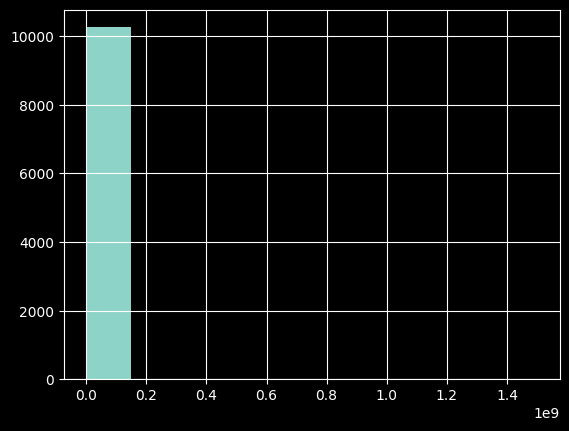

In [ ]:
X_train['salary'].hist()

In [ ]:
X_train_nona

,gender,device_quaility_index,behavioral_index,type_of_document,age,email_domain_formatted,social_status,salary,disbursment_type,os,email_index
3132,0,1.0,5.0,UMID,24,GMAIL.COM,Other,20000.0,E-wallet,Android,0.0
7655,1,2.0,5.0,Passport,35,YAHOO.COM,Other,15000.0,E-wallet,Android,0.0
3520,1,3.0,4.0,Passport,37,ICLOUD.COM,Other,25000.0,E-wallet,iOS,8.0
14251,1,3.0,5.0,UMID,26,GMAIL.COM,"Professional Worker (Doctors, Engineers, Accou...",16000.0,Bank,iOS,1.0
2588,0,3.0,6.0,Driver license ID,50,GMAIL.COM,Business Owner,40000.0,E-wallet,Android,1.0
...,...,...,...,...,...,...,...,...,...,...,...
11964,0,3.0,3.0,Passport,51,GMAIL.COM,Other,45000.0,Bank,iOS,1.0
13418,1,2.0,4.0,UMID,26,YAHOO.COM,BPO Professionals,24000.0,Bank,macOS,1.0
5390,0,3.0,4.0,Driver license ID,24,GMAIL.COM,Self-Employed,18000.0,E-wallet,Android,8.0
860,1,0.0,3.0,UMID,28,GMAIL.COM,BPO Professionals,25000.0,Bank,Android,1.0


In [ ]:
X_train_nona_noout = X_train_nona[X_train_nona['salary'] <= X_train_nona['salary'].quantile(0.99)].copy()

In [ ]:
y_train_nona_noout = y_train_nona[y_train_nona.index.isin(X_train_nona_noout.index)].copy()

In [ ]:
X_train_nona_noout

,gender,device_quaility_index,behavioral_index,type_of_document,age,email_domain_formatted,social_status,salary,disbursment_type,os,email_index
3132,0,1.0,5.0,UMID,24,GMAIL.COM,Other,20000.0,E-wallet,Android,0.0
7655,1,2.0,5.0,Passport,35,YAHOO.COM,Other,15000.0,E-wallet,Android,0.0
3520,1,3.0,4.0,Passport,37,ICLOUD.COM,Other,25000.0,E-wallet,iOS,8.0
14251,1,3.0,5.0,UMID,26,GMAIL.COM,"Professional Worker (Doctors, Engineers, Accou...",16000.0,Bank,iOS,1.0
2588,0,3.0,6.0,Driver license ID,50,GMAIL.COM,Business Owner,40000.0,E-wallet,Android,1.0
...,...,...,...,...,...,...,...,...,...,...,...
11964,0,3.0,3.0,Passport,51,GMAIL.COM,Other,45000.0,Bank,iOS,1.0
13418,1,2.0,4.0,UMID,26,YAHOO.COM,BPO Professionals,24000.0,Bank,macOS,1.0
5390,0,3.0,4.0,Driver license ID,24,GMAIL.COM,Self-Employed,18000.0,E-wallet,Android,8.0
860,1,0.0,3.0,UMID,28,GMAIL.COM,BPO Professionals,25000.0,Bank,Android,1.0


In [ ]:
ohe = OneHotEncoder(drop='first')

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train_num_manual = pd.DataFrame(scaler.fit_transform(X_train_nona_noout[num_attribs]))

In [ ]:
X_train_cat_manual = pd.DataFrame(ohe.fit_transform(X_train_nona_noout[cat_attribs]).toarray())

In [ ]:
X_train_manual_prep = pd.concat([X_train_num_manual,X_train_cat_manual],axis=1)

In [ ]:
X_train_manual_prep.shape

(9767, 91)

In [ ]:
log_reg = LogisticRegression(max_iter=1000)

In [ ]:
scores = cross_val_score(log_reg, X_train_manual_prep, y_train_nona_noout['fpd5_flg'].values,
                         scoring=make_scorer(roc_auc_score), cv=5)

In [ ]:
scores

array([0.50482747, 0.49989161, 0.50317604, 0.50918973, 0.49930868])

In [ ]:
log_reg = LogisticRegression()

In [ ]:
scores = cross_val_score(log_reg, X_train_num_manual, y_train_nona_noout['fpd5_flg'].values,
                         scoring=make_scorer(roc_auc_score), cv=5)

In [ ]:
scores

array([0.49964838, 0.5       , 0.5       , 0.5       , 0.5       ])

In [ ]:
cb = CatBoostClassifier(iterations=100,verbose=0)

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
scores = cross_val_score(log_reg, X_train_nona_noout[num_attribs], y_train_nona_noout['fpd5_flg'].values,
                         scoring='roc_auc', cv=cv)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
scores

array([0.57282711, 0.56128454, 0.55208961, 0.56640811, 0.54757939,
       0.57212388, 0.58826655, 0.56490257, 0.59429982, 0.59585224,
       0.54994554, 0.58852564, 0.56485623, 0.55821251, 0.54325423,
       0.57095005, 0.59797701, 0.61947474, 0.58435103, 0.56841281,
       0.6044621 , 0.57187536, 0.60070271, 0.59987257, 0.5704451 ,
       0.58025602, 0.56372736, 0.53656677, 0.55393679, 0.55341401])

In [ ]:
log_reg = LogisticRegression(max_iter=10000)

In [ ]:
scores = cross_val_score(log_reg, X_train_manual_prep, y_train_nona_noout['fpd5_flg'].values,
                         scoring='roc_auc', cv=cv)

In [ ]:
scores

array([0.64351808, 0.61974557, 0.57859839, 0.61114812, 0.60504637,
       0.64771105, 0.61175618, 0.63487769, 0.6292758 , 0.63981636,
       0.60722481, 0.66602688, 0.58437761, 0.59771528, 0.61747724,
       0.61205228, 0.67036262, 0.65222916, 0.62251944, 0.60617254,
       0.65573744, 0.62115997, 0.65635079, 0.6164594 , 0.60543236,
       0.63710965, 0.63103434, 0.59355607, 0.6147122 , 0.60159754])

In [ ]:
scores.mean()

0.6230267083131078

In [ ]:
scores = cross_val_score(log_reg, X_train_prep, y_train['fpd5_flg'].values,
                         scoring='roc_auc', cv=cv)

In [ ]:
scores.mean()

0.6248393816753126

In [ ]:
log_reg = LogisticRegression(max_iter=10000,class_weight='balanced')

In [ ]:
scores = cross_val_score(log_reg, X_train_prep, y_train['fpd5_flg'].values,
                         scoring='roc_auc', cv=cv)

In [ ]:
scores.mean()

0.6250839175490822

1. Target encoding in pipeline
2. regroup categorical features
3. In order to debug pipeline fit logistic regression on original data (prepared manualy)
4. cross val with two metrics

# Cross validation with two metrics

In [ ]:
X_train_prep = pd.DataFrame(full_pipeline.fit_transform(X_train).toarray())

In [ ]:
cat_features_names = list(full_pipeline.transformers_[1][1].get_feature_names_out())

In [ ]:
X_train_prep.columns = most_freq_num_features+median_num_features + \
            ['salary_over_age'] + cat_features_names

In [ ]:
log_reg = LogisticRegression(max_iter=10000)

In [ ]:
tree_reg = DecisionTreeClassifier(random_state=42)

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
scoring = {'roc_auc': 'roc_auc',
           'average_precision': 'average_precision'}

In [ ]:
scores = cross_validate(log_reg, X_train_prep, y_train['fpd5_flg'].values, scoring=scoring,
                         cv=cv, return_train_score=True)

In [ ]:
scores['test_average_precision'].mean()

0.36799599643326736

In [ ]:
scores['test_roc_auc'].mean()

0.6248393816753126

In [ ]:
scores['test_average_precision'].mean()

0.36799599643326736

In [ ]:
import matplotlib.pyplot as plt


plt.style.use('dark_background')

<Axes: >

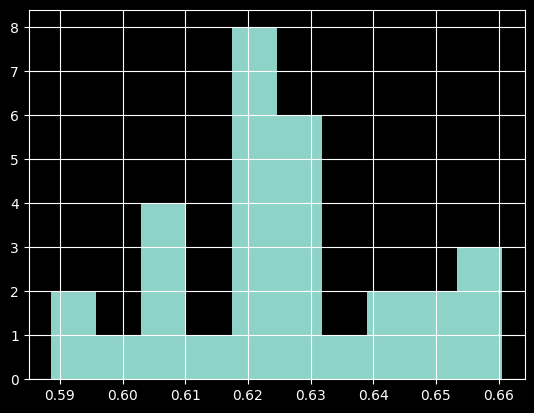

In [ ]:
pd.Series(scores['test_roc_auc']).hist()

In [ ]:
scores = cross_validate(tree_reg, X_train_prep, y_train['fpd5_flg'].values, scoring=scoring,
                         cv=cv, return_train_score=True)

In [ ]:
scores['test_average_precision'].mean()

0.2813511831500889

In [ ]:
scores['test_roc_auc'].mean()

0.5206769245058787

# Target encoding

In [ ]:
df['type_of_document'].value_counts()

,count
type_of_document,
UMID,5419
Driver license ID,3073
TIN,3057
Passport,1867
SSS,1498
PRC,449


In [ ]:
cat_dict = df.groupby('type_of_document')['fpd5_flg'].mean().to_dict()

In [ ]:
cat_dict

{'Driver license ID': 0.27790432801822323,
 'PRC': 0.1870824053452116,
 'Passport': 0.2747723620782003,
 'SSS': 0.24299065420560748,
 'TIN': 0.3071638861629048,
 'UMID': 0.26517807713600294}

In [ ]:
df['type_of_document'].map(cat_dict)

,type_of_document
0,0.265178
1,0.265178
2,0.242991
3,0.307164
4,0.265178
...,...
15358,0.265178
15359,0.274772
15360,0.265178
15361,0.265178


In [ ]:
class TargetEncoder(BaseEstimator, TransformerMixin):
    def __init__(self): # no *args or **kargs
        self.features_dict = {}
        self.mean_pd = None

    def fit(self, X, y=None):
        df = X.copy()
        df = df.fillna('na')
        cols = df.columns
        df['fpd5_flg'] = y
        self.mean_pd = df['fpd5_flg'].mean()

        for col in cols:
          self.features_dict[col] = df.groupby(col)['fpd5_flg'].mean().to_dict()

        return self

    def transform(self, X):
        X = X.fillna('na')
        for col, d in self.features_dict.items():
          X[col] = X[col].map(d)

        return X.fillna(self.mean_pd)

## todo atribute adder with target encoding

In [ ]:
te = TargetEncoder()

In [ ]:
te.fit(X_train[cat_attribs],y_train)

TargetEncoder()

In [ ]:
te.transform(X_train[cat_attribs]).isna().mean()

,0
type_of_document,0.0
email_domain_formatted,0.0
social_status,0.0
disbursment_type,0.0
os,0.0


In [ ]:
te.transform(X_test[cat_attribs]).isna().mean()

,0
type_of_document,0.0
email_domain_formatted,0.0
social_status,0.0
disbursment_type,0.0
os,0.0


In [ ]:
log_reg = LogisticRegression(max_iter=10000)

In [ ]:
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", TargetEncoder(), cat_attribs),
    ])

In [ ]:
model_pipe = Pipeline([
    ('preprocessing', full_pipeline),
    ('model', log_reg)]
)

In [ ]:
model_pipe.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   ColumnTransformer(transformers=[('most_freq',
                                                                                                    Pipeline(steps=[('imputer',
                                                                                                                     SimpleImputer(strategy='most_frequent'))]),
                                                                                                    ['gender',
                                                                                                     'device_quaility_index',
                                                                                                     'behavioral_index',
                                                                                                     'email_index']),
                                                                                                   ('median',
                                                                                                    Pipeline(steps=[('imputer',
                                                                                                                     SimpleImputer(strategy='median'))]),
                                                                                                    ['age',
                                                                                                     'salary'])])),
                                                                  ('attribs_adder',
                                                                   CombinedAttributesAdder()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['gender',
                                                   'device_quaility_index',
                                                   'behavioral_index', 'age',
                                                   'salary', 'email_index']),
                                                 ('cat', TargetEncoder(),
                                                  ['type_of_document',
                                                   'email_domain_formatted',
                                                   'social_status',
                                                   'disbursment_type',
                                                   'os'])])),
                ('model', LogisticRegression(max_iter=10000))])

In [ ]:
model_pipe.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
scores = cross_validate(model_pipe, X_train, y_train['fpd5_flg'].values,
                        scoring=scoring,
                         cv=cv, return_train_score=True)

In [ ]:
scores

{'fit_time': array([0.14812803, 0.14075804, 0.14482784, 0.10414934, 0.10087919,
        0.0999167 , 0.10042143, 0.10503459, 0.12908077, 0.10811472,
        0.09579682, 0.1002841 , 0.11271834, 0.09819341, 0.12183428,
        0.1011951 , 0.10874867, 0.10256743, 0.10161853, 0.10731936,
        0.12951612, 0.10331511, 0.10201263, 0.10852265, 0.11349201,
        0.10650826, 0.13457847, 0.09906268, 0.10063457, 0.10346484]),
 'score_time': array([0.02535319, 0.02497482, 0.03928876, 0.02223253, 0.02160335,
        0.02464151, 0.02427387, 0.02396297, 0.02148581, 0.02057171,
        0.02127218, 0.02101445, 0.02446508, 0.02420616, 0.02064133,
        0.02084947, 0.02090311, 0.02399731, 0.02122045, 0.02201247,
        0.02268696, 0.02258992, 0.02289581, 0.02336597, 0.02091527,
        0.0219593 , 0.02224755, 0.02113461, 0.02177572, 0.0220716 ]),
 'test_roc_auc': array([0.58947602, 0.62692061, 0.62660312, 0.65493081, 0.65566884,
        0.6207159 , 0.60769083, 0.61854651, 0.62022166, 0.62802883,
  

In [ ]:
scores['test_roc_auc'].mean()

0.6251992954024862

In [ ]:
scores['test_average_precision'].mean()

0.3674898353492553

# Target encoding + ohe

In [ ]:
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat_te", TargetEncoder(), cat_attribs),
        ("cat_ohe", OneHotEncoder(handle_unknown='ignore'), cat_attribs),
    ])

In [ ]:
model_pipe = Pipeline([
    ('preprocessing', full_pipeline),
    ('model', log_reg)]
)

In [ ]:
scores = cross_validate(model_pipe, X_train, y_train['fpd5_flg'].values,
                        scoring=scoring,
                         cv=cv, return_train_score=True)

In [ ]:
scores['test_roc_auc'].mean()

0.6251429086020167

In [ ]:
scores['test_average_precision'].mean()

0.3679138707865323

# Grid search

In [ ]:
log_reg = LogisticRegression()

In [ ]:
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat_te", TargetEncoder(), cat_attribs),
    ])

In [ ]:
model_pipe = Pipeline([
    ('preprocessing', full_pipeline),
    ('model', log_reg)]
)

In [ ]:
scores = cross_validate(model_pipe, X_train, y_train['fpd5_flg'].values,
                        scoring=scoring,
                        cv=5, return_train_score=True)

In [ ]:
scores['test_roc_auc'].mean()

0.6245188028980377

In [ ]:
 param_grid={'model__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
             'model__penalty': ['none', 'l2']}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
clf = GridSearchCV(model_pipe, param_grid,cv=5,scoring='roc_auc',n_jobs=-1)

In [ ]:
clf.fit(X_train, y_train['fpd5_flg'].values)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
35 fits failed out of a total of 70.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
17 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 473, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
  File "/usr/local/lib/pyth

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          ColumnTransformer(transformers=[('most_freq',
                                                                                                                           Pipeline(steps=[('imputer',
                                                                                                                                            SimpleImputer(strategy='most_frequent'))]),
                                                                                                                           ['gender',
                                                                                                                            'device_quaility_index',
                                                                                                                            'behavioral_index',
                                                                                                                            'email_index']),
                                                                                                                          ('median',
                                                                                                                           Pipeline(steps=[('imputer',
                                                                                                                                            Si...
                                                                                          StandardScaler())]),
                                                                         ['gender',
                                                                          'device_quaility_index',
                                                                          'behavioral_index',
                                                                          'age',
                                                                          'salary',
                                                                          'email_index']),
                                                                        ('cat_te',
                                                                         TargetEncoder(),
                                                                         ['type_of_document',
                                                                          'email_domain_formatted',
                                                                          'social_status',
                                                                          'disbursment_type',
                                                                          'os'])])),
                                       ('model', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'model__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'model__penalty': ['none', 'l2']},
             scoring='roc_auc')

In [ ]:
clf.best_params_

{'model__C': 1, 'model__penalty': 'l2'}